In [1]:
# -------------------------------- IMPORT LIBRARIES --------------------------------
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
from varname import nameof

import requests
from bs4 import BeautifulSoup
import html
import lxml

import sys, os

dir = os.path.dirname
sys.path.append(dir(os.getcwd()))

import src.utils.mining_data_tb as md
import src.utils.visualization_tb as vis
import src.utils.folder_tb as fo

import warnings
warnings.filterwarnings('ignore')

In [2]:
path = fo.path_to_folder(2, "data")
filename = "2017-2018 FNDDS At A Glance - FNDDS Nutrient Values.xlsx"

nutrition = md.get_nutrition_data(path, filename)

filter_ = md.nutrients_filter_2(2)
filter_.extend(["Category 2", "Category 3"])
fats = nutrition[filter_]
fats.head()

sns.set_theme()

sns.catplot(x = "Energy (kcal)", y = "Category 2", data = nutrition)

stats = nutrition.groupby("Category 2").agg(
    {"Protein (g)" : (np.mean, np.median, np.std),
    "Energy (kcal)" : (np.mean, np.median, np.std),
    "Total Fat (g)" : (np.mean, np.median, np.std),
    "Fatty acids, total saturated (g)" : (np.mean, np.median, np.std),
    "Fatty acids, total monounsaturated (g)" : (np.mean, np.median, np.std),
    "Fatty acids, total polyunsaturated (g)" : (np.mean, np.median, np.std),
    "Cholesterol (mg)" : (np.mean, np.median, np.std)}).sort_values(
        by = ("Protein (g)", "mean"), ascending = False
    ).T

def plot_resources_stats(to_plot):
    number_of_axes = len(to_plot["Resource"].unique())

    if number_of_axes <= 2:
        fig, axes = plt.subplots(1, number_of_axes, figsize = (15, 7))
    

    resources = list(to_plot["Resource"].unique())

    for index in range(number_of_axes):
        sns.barplot(x = "Mean_median", y = "Values", hue = "Origin",
                    data = to_plot[to_plot["Resource"] == resources[index]], ax = axes[index])
        axes[index].set_title(resources[index], fontdict = {'fontsize': 14, 'fontweight' : "bold"})

    return fig

number = 3

rows = 0
columns = 0

while number > 0:
    

In [3]:
protein_ = nutrition.sort_values(by = "Protein (g)", ascending = False).head(20)

In [8]:
protein_[protein_["Category 3"] != "_others"]

,Category number,Category name,Protein (g),Water (g),"Fiber, total dietary (g)","Vitamin A, RAE (mcg_RAE)",Thiamin (mg),Riboflavin (mg),Niacin (mg),Vitamin B-6 (mg),...,Energy (kcal),Total Fat (g),"Fatty acids, total saturated (g)","Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)",Cholesterol (mg),Vitamin D (D2 + D3) (mcg),Carbohydrate (g),Category 2,Category 3
Food name,,,,,,,,,,,,,,,,,,,,,
"Tuna, fresh, dried",2402,Fish,76.25,18.84,0.0,51,0.332,0.341,54.848,2.624,...,341,1.53,0.538,0.363,0.459,122,5.3,0.00,fish,animal
"Salmon, dried",2402,Fish,64.06,23.50,0.0,98,0.225,0.312,23.735,1.718,...,397,13.75,2.531,4.212,2.534,144,34.1,0.00,fish,animal
"Cod, dried, salted",2402,Fish,62.82,16.14,0.0,42,0.268,0.240,7.500,0.864,...,290,2.37,0.462,0.342,0.804,152,4.0,0.00,fish,animal
"Fish, NS as to type, dried",2402,Fish,62.82,16.14,0.0,42,0.268,0.240,7.500,0.864,...,290,2.37,0.462,0.342,0.804,152,4.0,0.00,fish,animal
Pork skin rinds,2006,Pork,61.30,1.80,0.0,12,0.099,0.283,1.549,0.023,...,544,31.30,11.370,14.780,3.640,95,0.0,0.00,meats,animal
"Squid, dried",2404,Shellfish,58.94,16.96,0.0,32,0.068,1.247,7.817,0.201,...,348,5.22,1.354,0.405,1.982,882,0.0,11.65,fish,animal
"Octopus, dried",2404,Shellfish,56.52,24.00,0.0,145,0.102,0.121,7.563,1.296,...,311,3.94,0.861,0.614,0.906,182,0.0,8.34,fish,animal
"Herring, dried, salted",2402,Fish,55.71,10.99,0.0,74,0.243,0.723,9.978,0.843,...,490,28.04,6.328,11.588,6.616,186,13.0,0.00,fish,animal
"Shrimp, dried",2404,Shellfish,51.70,38.86,0.0,0,0.018,0.038,1.413,0.025,...,253,3.44,0.476,0.273,1.732,638,0.0,0.00,fish,animal


In [5]:
def nutritionfacts_graph1(df, nutrient):
    sns.set_theme()

    fig, ax1 = plt.subplots(1, 1, figsize = (12, 12))
    splot = sns.barplot(x = df[nutrient], y = df.index, hue = "Category 3", data = df, ax = ax1)

    return fig

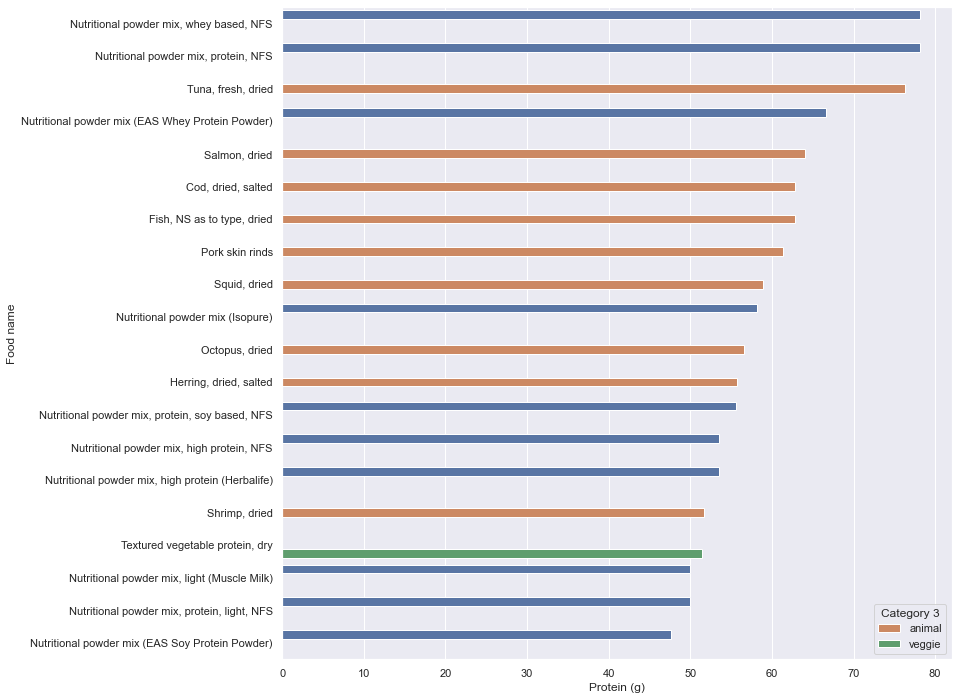

In [6]:
nutritionfacts_graph1(protein_, "Protein (g)")
plt.show()

In [9]:
path4 = fo.path_to_folder(2, "data")
filename2 = "daily_intakes.csv"
daily_intake_df = pd.read_csv(path4 + filename2)

#md.daily_intake_info()
daily_intake_df

,gender,age,url
0,female,20,https://www.eatforhealth.gov.au/node/1813927/d...
1,female,30,https://www.eatforhealth.gov.au/node/1813927/d...
2,female,40,https://www.eatforhealth.gov.au/node/1813927/d...
3,female,50,https://www.eatforhealth.gov.au/node/1813927/d...
4,female,60,https://www.eatforhealth.gov.au/node/1813927/d...
5,female,70,https://www.eatforhealth.gov.au/node/1813927/d...
6,male,20,https://www.eatforhealth.gov.au/node/1813927/d...
7,male,30,https://www.eatforhealth.gov.au/node/1813927/d...
8,male,40,https://www.eatforhealth.gov.au/node/1813927/d...
9,male,50,https://www.eatforhealth.gov.au/node/1813927/d...


In [10]:
def turn_page(iterable):
    start = 0
    end = 10

    while end < len(iterable):
        yield iterable[start:end]
        start += 10
        end += 10

In [17]:
test = list(range(100))

In [21]:
generator = turn_page(test)

In [25]:
next(generator)

[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]